In [2]:
# Librerías necesarias

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from tensorflow import keras
import cv2
from skimage.io import imread
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
import warnings
warnings.filterwarnings('ignore')

In [8]:
# Vemos que formato tienen los datos para el test

df_test = pd.read_csv('../data/test_set.csv')
df_test

,id_img
0,10052
1,10065
2,10079
3,10095
4,10121
...,...
7061,9806
7062,9830
7063,9853
7064,9878


In [9]:
# Función para agregar el path de la imagen.

def construir_ruta(row):
    return f"../data/images/test/{row['id_img']}.jpg"

# Agregamos la columna 'path' aplicandole la función.

df_test['path'] = df_test.apply(construir_ruta, axis=1)

df_test

,id_img,path
0,10052,../data/images/test/10052.jpg
1,10065,../data/images/test/10065.jpg
2,10079,../data/images/test/10079.jpg
3,10095,../data/images/test/10095.jpg
4,10121,../data/images/test/10121.jpg
...,...,...
7061,9806,../data/images/test/9806.jpg
7062,9830,../data/images/test/9830.jpg
7063,9853,../data/images/test/9853.jpg
7064,9878,../data/images/test/9878.jpg


In [10]:
# Vemos como debe ser el dataframe que tenemos que subir.

sample = pd.read_csv('../data/sample_submision.csv')
sample

,id_img,label
0,10052,surprise
1,10065,surprise
2,10079,surprise
3,10095,surprise
4,10121,surprise
...,...,...
7061,9806,surprise
7062,9830,surprise
7063,9853,surprise
7064,9878,surprise


In [11]:
# Vemos como son los datos para el train.

df_train = pd.read_csv('../data/train_set.csv')
df_train

,id_img,path,label
0,0,../data/images/train/angry\0.jpg,angry
1,1,../data/images/train/angry\1.jpg,angry
2,10,../data/images/train/angry\10.jpg,angry
3,10002,../data/images/train/angry\10002.jpg,angry
4,10016,../data/images/train/angry\10016.jpg,angry
...,...,...,...
28816,9969,../data/images/train/surprise\9969.jpg,surprise
28817,9985,../data/images/train/surprise\9985.jpg,surprise
28818,9990,../data/images/train/surprise\9990.jpg,surprise
28819,9992,../data/images/train/surprise\9992.jpg,surprise


In [12]:
# Modificamos un error en la columna 'path'.

df_train['path'] = df_train['path'].str.replace("\\", "/")
df_train

,id_img,path,label
0,0,../data/images/train/angry/0.jpg,angry
1,1,../data/images/train/angry/1.jpg,angry
2,10,../data/images/train/angry/10.jpg,angry
3,10002,../data/images/train/angry/10002.jpg,angry
4,10016,../data/images/train/angry/10016.jpg,angry
...,...,...,...
28816,9969,../data/images/train/surprise/9969.jpg,surprise
28817,9985,../data/images/train/surprise/9985.jpg,surprise
28818,9990,../data/images/train/surprise/9990.jpg,surprise
28819,9992,../data/images/train/surprise/9992.jpg,surprise


In [13]:
# La etiqueta 'disgust' cuenta con menos datos que los demas.

df_train['label'].value_counts()

label
happy       7164
neutral     4982
sad         4938
fear        4103
angry       3993
surprise    3205
disgust      436
Name: count, dtype: int64

In [14]:
# Damos valores numéricos a las etiquetas.

class_names = ['happy', 'neutral', 'sad', 'fear', 'angry', 'surprise', 'disgust']
class_names_label = {class_name:i for i, class_name in enumerate(class_names)}
class_names_label

{'happy': 0,
 'neutral': 1,
 'sad': 2,
 'fear': 3,
 'angry': 4,
 'surprise': 5,
 'disgust': 6}

In [15]:
IMAGE_SIZE = (48,48)
TRAIN_PATH = os.getcwd() + "\\..\\data\\images\\train"
# TEST_PATH = os.getcwd() + "\\data\\images\\test"

In [16]:
# Función para leer las imagenes y devolverlas como arrays.

def read_data(path, im_size):
    X = []
    y = []

    for folder in os.listdir(path):
        label = class_names_label[folder]
        folder_path = os.path.join(path, folder)

        for file in os.listdir(folder_path):
            image_path = os.path.join(folder_path, file)
            image = imread(image_path)
            smallimage = cv2.resize(image, im_size)

            X.append(smallimage)
            y.append(label)
    
    return np.array(X), np.array(y)

    # X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # return X_train, X_test, y_train, y_test


In [17]:
# Función para cargar imagenes como arrays.

def cargar_imagenes(df_test):
    imagenes = []

    for index, row in df_test.iterrows():
        image_path = row['path']
        image = imread(image_path)
        imagenes.append(image)

    return np.array(imagenes)

imagenes_array = cargar_imagenes(df_test)

In [20]:
imagenes_array[1]

array([[ 23,  26,  21, ..., 217, 220, 218],
       [ 25,  36,  16, ..., 209, 203, 208],
       [ 30,  28,  11, ..., 179, 214, 245],
       ...,
       [ 48,  43,  55, ..., 223, 222, 222],
       [ 36,  20,  64, ..., 252, 255, 255],
       [ 59,  56,  46, ..., 252, 252, 253]], dtype=uint8)

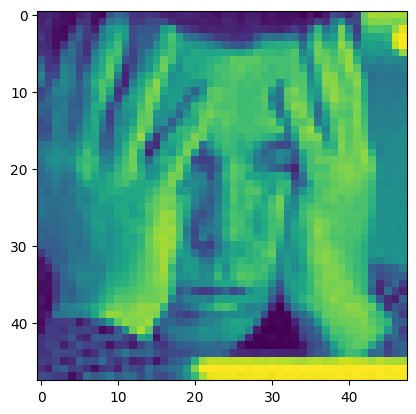

In [19]:
# Vemos una de las imágenes.

plt.imshow(imagenes_array[1])

In [21]:
# Normalizamos los pixeles.

imagenes_array = imagenes_array/255

In [22]:
# Comprobamos.

print(imagenes_array.max())
print(imagenes_array.min())

1.0
0.0


In [23]:
# Definimos X e y.

X, y = read_data(TRAIN_PATH, IMAGE_SIZE)

In [25]:
# Comprobamos que tengan la misma dimensión.

print(X.shape)
print(y.shape)

(28821, 48, 48)
(28821,)


In [26]:
# Hacemos el train-test split.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(23056, 48, 48)
(5765, 48, 48)
(23056,)
(5765,)


sad


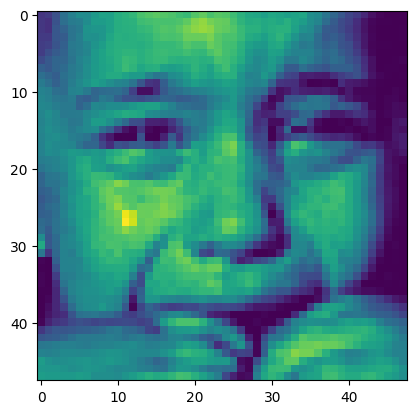

In [27]:
# Imagén random.

index = np.random.randint(X.shape[0])
print(class_names[y[index]])
plt.imshow(X[index])

In [28]:
print(X_train.min())
print(X_train.max())

0
255


In [29]:
# Normalizamos.

X_train = X_train/255
X_test = X_test/255

In [30]:
print(X_train.min())
print(X_train.max())

0.0
1.0


In [31]:
print(X_test.min())
print(X_test.max())

0.0
1.0


In [38]:
# Creamos el modelo.

model = keras.Sequential([
    # 32 matrices de salida de 48x48
    # El kernel de 3x3 toma matrices de este tamaño dentro de la imágen y aplica el producto escalar.
    # Función de activación ReLu ---> max(0,x)
    keras.layers.Conv2D(32, (3, 3), padding='same', activation="relu", input_shape=(48, 48, 1)),
    keras.layers.Conv2D(64, (3, 3), padding='same', activation="relu"),
    # BatchNormalization mejora la taza de aprendizaje
    keras.layers.BatchNormalization(),
    # Con Maxpooling reducimos a la mitad y nos quedamos con los valores mas altos.
    # Nos quedan 64 imágenes de 24x24
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    # Dropout hace que se ignoren ciertas neuronas al azar, entonces la red se vuelve menos sensible
    # a los pesos específicos de las neuronas. Generaliza mejor y es menos probable que se sobreadapte
    # a los datos de entrenamiento
    keras.layers.Dropout(0.25),
    
    keras.layers.Conv2D(128, (5, 5), padding='same', activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Dropout(0.25),

    # l2 penaliza los coeficientes y la pendiente de la línea irá más hacia 0, pero nunca será igual a 0.
    keras.layers.Conv2D(512, (3, 3), padding='same', activation="relu", kernel_regularizer=keras.regularizers.l2(0.01)),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Dropout(0.25),

    keras.layers.Conv2D(512, (3, 3), padding='same', activation="relu", kernel_regularizer=keras.regularizers.l2(0.01)),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Dropout(0.25),

    keras.layers.Flatten(),
    keras.layers.Dense(256, activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.25),
    
    keras.layers.Dense(512, activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.25),

    keras.layers.Dense(7, activation="softmax")
])

In [39]:
# checkpoint = keras.callbacks.ModelCheckpoint('mejor_modelo.h5', monitor='val_accuracy', save_best_only=True, mode='max', verbose=1)
early_stopping = keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=10, restore_best_weights=True)

In [40]:
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0001), loss="sparse_categorical_crossentropy", metrics=['accuracy'])

In [41]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 48, 48, 32)        320       
                                                                 
 conv2d_6 (Conv2D)           (None, 48, 48, 64)        18496     
                                                                 
 batch_normalization_8 (Bat  (None, 48, 48, 64)        256       
 chNormalization)                                                
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 24, 24, 64)        0         
 g2D)                                                            
                                                                 
 dropout_8 (Dropout)         (None, 24, 24, 64)        0         
                                                                 
 conv2d_7 (Conv2D)           (None, 24, 24, 128)      

In [42]:
history = model.fit(X_train, y_train, batch_size=64, epochs=60, validation_data=(X_test, y_test), callbacks=[early_stopping])

Epoch 1/60
361/361 [==============================] - 149s 407ms/step - loss: 9.2732 - accuracy: 0.1979 - val_loss: 9.1663 - val_accuracy: 0.1705
Epoch 2/60
361/361 [==============================] - 149s 412ms/step - loss: 8.1947 - accuracy: 0.2543 - val_loss: 7.5410 - val_accuracy: 0.2800
Epoch 3/60
361/361 [==============================] - 138s 382ms/step - loss: 7.1567 - accuracy: 0.3054 - val_loss: 6.5361 - val_accuracy: 0.3547
Epoch 4/60
361/361 [==============================] - 143s 395ms/step - loss: 6.2068 - accuracy: 0.3384 - val_loss: 5.7050 - val_accuracy: 0.3912
Epoch 5/60
361/361 [==============================] - 138s 384ms/step - loss: 5.3637 - accuracy: 0.3716 - val_loss: 4.8646 - val_accuracy: 0.4213
Epoch 6/60
361/361 [==============================] - 134s 370ms/step - loss: 4.6271 - accuracy: 0.4003 - val_loss: 4.1812 - val_accuracy: 0.4434
Epoch 7/60
361/361 [==============================] - 134s 372ms/step - loss: 4.0279 - accuracy: 0.4247 - val_loss: 3.7345 -

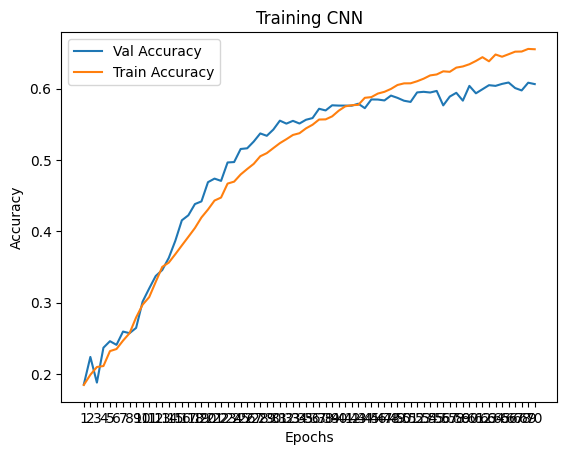

In [146]:
df_hist = pd.DataFrame(history.history, index=np.arange(1,71))

plt.plot(df_hist['val_accuracy'], label="Val Accuracy")
plt.plot(df_hist['accuracy'], label="Train Accuracy")
plt.title("Training CNN")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.xticks(range(1,71))
plt.legend()

In [129]:
pred = model.predict(X_test)

226/226 [==============================] - 4s 16ms/step


<Axes: >

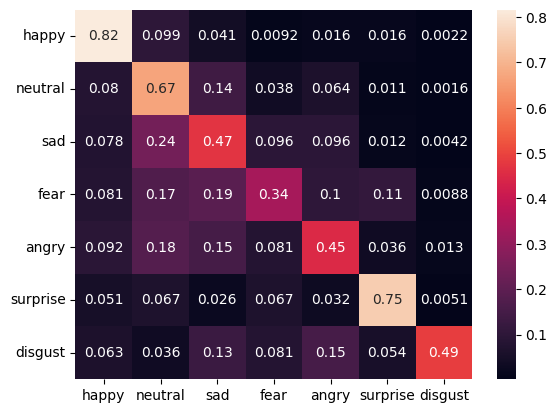

In [130]:
etiquetas = np.argmax(pred, axis=1)
c_mat = confusion_matrix(y_test, etiquetas, normalize='true')
sns.heatmap(c_mat, annot=True, xticklabels=class_names, yticklabels=class_names)

In [131]:
results = model.evaluate(X_test, y_test)
results

226/226 [==============================] - 4s 16ms/step - loss: 1.4462 - accuracy: 0.6026


[1.446207046508789, 0.6025534272193909]

In [132]:
predicciones = model.predict(imagenes_array)

221/221 [==============================] - 4s 16ms/step


In [133]:
etiquetas_predichas = np.argmax(predicciones, axis=1)

In [134]:
label_pred = [class_names[pred] for pred in etiquetas_predichas]
label_pred

['happy',
 'sad',
 'angry',
 'angry',
 'angry',
 'angry',
 'fear',
 'angry',
 'happy',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'happy',
 'happy',
 'neutral',
 'angry',
 'sad',
 'happy',
 'neutral',
 'angry',
 'neutral',
 'angry',
 'angry',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'angry',
 'happy',
 'angry',
 'neutral',
 'angry',
 'angry',
 'angry',
 'happy',
 'angry',
 'happy',
 'sad',
 'angry',
 'happy',
 'angry',
 'angry',
 'neutral',
 'disgust',
 'fear',
 'fear',
 'angry',
 'neutral',
 'fear',
 'fear',
 'angry',
 'neutral',
 'disgust',
 'happy',
 'angry',
 'neutral',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'surprise',
 'angry',
 'neutral',
 'angry',
 'neutral',
 'angry',
 'neutral',
 'sad',
 'angry',
 'angry',
 'neutral',
 'angry',
 'fear',
 'angry',
 'sad',
 'angry',
 'sad',
 'angry',
 'angry',
 'angry',
 'disgust',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'surprise',
 'neutral',
 'neutral',
 'happy',
 'angry',
 'neutral'

In [136]:
df_test['label'] = label_pred
df_test.drop('path', axis=1, inplace=True)
df_test

,id_img,label
0,10052,happy
1,10065,sad
2,10079,angry
3,10095,angry
4,10121,angry
...,...,...
7061,9806,surprise
7062,9830,happy
7063,9853,surprise
7064,9878,happy


In [137]:
df_test.to_csv('prediccion_4.csv', index=False)

In [47]:
from keras.models import load_model

mejor_modelo = load_model('mejor_modelo.h5')

In [48]:
predicciones = mejor_modelo.predict(X_test)

181/181 [==============================] - 6s 34ms/step


In [49]:
etiquetas_predichas = np.argmax(predicciones, axis=1)

In [50]:
etiquetas_predichas

array([2, 2, 0, ..., 2, 2, 4], dtype=int64)

<Axes: >

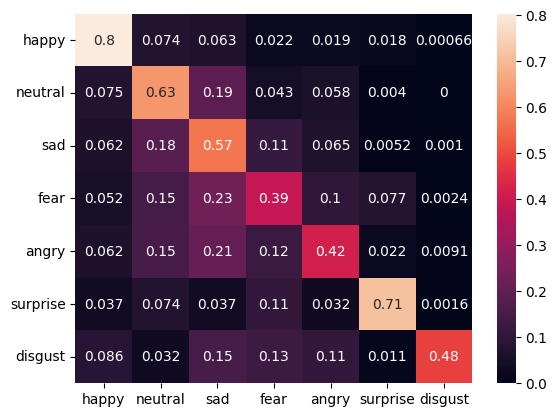

In [51]:
c_mat = confusion_matrix(y_test, etiquetas_predichas, normalize='true')
sns.heatmap(c_mat, annot=True, xticklabels=class_names, yticklabels=class_names)

In [52]:
results = mejor_modelo.evaluate(X_test, y_test)
results

181/181 [==============================] - 6s 33ms/step - loss: 2.3568 - accuracy: 0.6088


[2.3567748069763184, 0.6088464856147766]

In [53]:
label_pred = [class_names[pred] for pred in etiquetas_predichas]
label_pred

['sad',
 'sad',
 'happy',
 'sad',
 'neutral',
 'neutral',
 'neutral',
 'angry',
 'surprise',
 'happy',
 'happy',
 'neutral',
 'happy',
 'sad',
 'happy',
 'neutral',
 'fear',
 'happy',
 'sad',
 'fear',
 'surprise',
 'fear',
 'sad',
 'sad',
 'sad',
 'happy',
 'sad',
 'happy',
 'happy',
 'surprise',
 'happy',
 'surprise',
 'surprise',
 'happy',
 'happy',
 'fear',
 'happy',
 'neutral',
 'happy',
 'happy',
 'sad',
 'fear',
 'fear',
 'happy',
 'fear',
 'happy',
 'sad',
 'happy',
 'happy',
 'neutral',
 'sad',
 'angry',
 'fear',
 'neutral',
 'sad',
 'neutral',
 'angry',
 'sad',
 'happy',
 'sad',
 'neutral',
 'happy',
 'neutral',
 'angry',
 'happy',
 'fear',
 'neutral',
 'neutral',
 'fear',
 'surprise',
 'happy',
 'sad',
 'neutral',
 'happy',
 'happy',
 'angry',
 'angry',
 'angry',
 'surprise',
 'happy',
 'sad',
 'happy',
 'happy',
 'angry',
 'sad',
 'fear',
 'surprise',
 'fear',
 'happy',
 'surprise',
 'sad',
 'angry',
 'angry',
 'happy',
 'neutral',
 'surprise',
 'sad',
 'sad',
 'fear',
 'sad

In [54]:
predicciones = mejor_modelo.predict(imagenes_array)

221/221 [==============================] - 7s 33ms/step


In [55]:
etiquetas_predichas = np.argmax(predicciones, axis=1)
etiquetas_predichas

array([0, 2, 4, ..., 5, 1, 5], dtype=int64)

In [56]:
label_pred = [class_names[pred] for pred in etiquetas_predichas]
label_pred

['happy',
 'sad',
 'angry',
 'angry',
 'fear',
 'sad',
 'angry',
 'sad',
 'neutral',
 'angry',
 'angry',
 'happy',
 'angry',
 'angry',
 'happy',
 'neutral',
 'neutral',
 'angry',
 'sad',
 'angry',
 'neutral',
 'angry',
 'neutral',
 'sad',
 'angry',
 'fear',
 'neutral',
 'neutral',
 'angry',
 'fear',
 'angry',
 'angry',
 'angry',
 'angry',
 'neutral',
 'neutral',
 'angry',
 'sad',
 'angry',
 'sad',
 'neutral',
 'angry',
 'angry',
 'fear',
 'neutral',
 'angry',
 'angry',
 'happy',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'neutral',
 'angry',
 'angry',
 'sad',
 'neutral',
 'sad',
 'angry',
 'fear',
 'angry',
 'angry',
 'angry',
 'sad',
 'angry',
 'sad',
 'angry',
 'sad',
 'sad',
 'neutral',
 'angry',
 'angry',
 'angry',
 'fear',
 'sad',
 'angry',
 'surprise',
 'sad',
 'angry',
 'sad',
 'fear',
 'angry',
 'angry',
 'disgust',
 'angry',
 'angry',
 'neutral',
 'sad',
 'angry',
 'angry',
 'surprise',
 'angry',
 'neutral',
 'angry',
 'angry',
 'sad',
 'fear',
 'angry',
 'sad',
 'sad'

In [58]:
df_test['label'] = label_pred
df_test

,id_img,label
0,10052,happy
1,10065,sad
2,10079,angry
3,10095,angry
4,10121,fear
...,...,...
7061,9806,surprise
7062,9830,happy
7063,9853,surprise
7064,9878,neutral


In [57]:
df_test.drop('path', axis=1, inplace=True)
df_test

,id_img
0,10052
1,10065
2,10079
3,10095
4,10121
...,...
7061,9806
7062,9830
7063,9853
7064,9878


In [59]:
df_test.to_csv('prediccion_3.csv', index=False)